# Rossmann Sales Forecasting - Complete Pipeline with Visualization, Preprocessing, Modeling, and Submission

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# 1. Load data

In [69]:
train = pd.read_csv(r'../data/train.csv',low_memory=False)
test = pd.read_csv(r'../data/test.csv',low_memory=False)
store = pd.read_csv(r'../data/store.csv',low_memory=False)

In [70]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [71]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


- Merge two datasets to get more information based on store

# 2. Merge Data

In [72]:
train_df = train.merge(store,how='left',on='Store')
test_df = test.merge(store,how='left',on='Store')

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [74]:
train_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

 - Here we can see the null vales in CompetitionDistance, CompetitionOpenSinceMonth,  CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval

## Check for Null values

In [75]:
print("\n================ NULL VALUES IN TRAIN DATA=====================\n")
print(f" Null vaues in CompetitionDistance is {train_df['CompetitionDistance'].isnull().sum()}")
print(f" Null vaues in CompetitionOpenSinceMonth is {train_df['CompetitionOpenSinceMonth'].isnull().sum()}")
print(f" Null vaues in CompetitionOpenSinceYear is {train_df['CompetitionOpenSinceYear'].isnull().sum()}")
print(f" Null vaues in Promo2SinceWeekr is {train_df['Promo2SinceWeek'].isnull().sum()}")
print(f" Null vaues in Promo2SinceYear is {train_df['Promo2SinceYear'].isnull().sum()}")
print(f" Null vaues in PromoInterval is {train_df['PromoInterval'].isnull().sum()}")

print(f"\n================ NULL VALUES IN TEST DATA=====================\n")
print(f" Null vaues in CompetitionDistance is {test_df['CompetitionDistance'].isnull().sum()}")
print(f" Null vaues in CompetitionOpenSinceMonth is {test_df['CompetitionOpenSinceMonth'].isnull().sum()}")
print(f" Null vaues in CompetitionOpenSinceYear is {test_df['CompetitionOpenSinceYear'].isnull().sum()}")
print(f" Null vaues in Promo2SinceWeekr is {test_df['Promo2SinceWeek'].isnull().sum()}")
print(f" Null vaues in Promo2SinceYear is {test_df['Promo2SinceYear'].isnull().sum()}")
print(f" Null vaues in PromoInterval is {test_df['PromoInterval'].isnull().sum()}")


================ NULL VALUES IN TRAIN DATA=====================

 Null vaues in CompetitionDistance is 2642
 Null vaues in CompetitionOpenSinceMonth is 323348
 Null vaues in CompetitionOpenSinceYear is 323348
 Null vaues in Promo2SinceWeekr is 508031
 Null vaues in Promo2SinceYear is 508031
 Null vaues in PromoInterval is 508031

================ NULL VALUES IN TEST DATA=====================

 Null vaues in CompetitionDistance is 96
 Null vaues in CompetitionOpenSinceMonth is 15216
 Null vaues in CompetitionOpenSinceYear is 15216
 Null vaues in Promo2SinceWeekr is 17232
 Null vaues in Promo2SinceYear is 17232
 Null vaues in PromoInterval is 17232


In [76]:
round(train_df.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.430,321.909,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998,1.997,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.819,3849.926,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.146,464.412,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830,0.376,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.382,0.486,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.179,0.383,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.086,7715.324,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.223,3.212,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690,5.993,1900.0,2006.0,2010.0,2013.0,2015.0


## Check for Duplicates

In [77]:
print(f"Duplicate values in Train data {train_df.duplicated().sum()}")
print(f"Duplicate values in Test data {test_df.duplicated().sum()}")

Duplicate values in Train data 0
Duplicate values in Test data 0


# 3. Handling Missing values

In [78]:
for df in [train_df,test_df]:
    df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
    df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].median(), inplace=True)
    df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].median(), inplace=True)
    df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].median(),inplace=True)
    df['Promo2SinceYear'].fillna(df['Promo2SinceYear'].median(),inplace = True)
    df['PromoInterval'].fillna("Jan,Apr,Jul,Oct",inplace = True)

# 4. Date Conversion and Feature Engineering

In [79]:
# convert data object to data format
for df in [train_df,test_df]:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

In [80]:
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

(None, None)

In [81]:
test_df.loc[test_df['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
479,480,622,4,2015-09-17,NaN,1,0,0,a,c,2425.0,7.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",17,9,2015
1335,1336,622,3,2015-09-16,NaN,1,0,0,a,c,2425.0,7.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",16,9,2015
2191,2192,622,2,2015-09-15,NaN,1,0,0,a,c,2425.0,7.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",15,9,2015
3047,3048,622,1,2015-09-14,NaN,1,0,0,a,c,2425.0,7.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",14,9,2015
4759,4760,622,6,2015-09-12,NaN,0,0,0,a,c,2425.0,7.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",12,9,2015
5615,5616,622,5,2015-09-11,NaN,0,0,0,a,c,2425.0,7.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",11,9,2015
6471,6472,622,4,2015-09-10,NaN,0,0,0,a,c,2425.0,7.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",10,9,2015
7327,7328,622,3,2015-09-09,NaN,0,0,0,a,c,2425.0,7.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",9,9,2015
8183,8184,622,2,2015-09-08,NaN,0,0,0,a,c,2425.0,7.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",8,9,2015
9039,9040,622,1,2015-09-07,NaN,0,0,0,a,c,2425.0,7.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",7,9,2015


In [82]:
test_df['Open'].fillna(1,inplace =True)

In [83]:
test_df.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Month                        0
Year                         0
dtype: int64

# 5. EDA -- Visualization

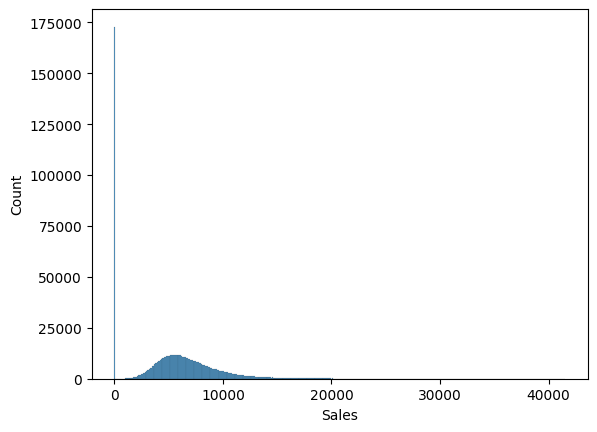

In [84]:
sns.histplot(data=train_df,x='Sales')
plt.show()

In [85]:
train_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

172817 were closed

In [86]:
train_df = train_df[train_df.Open==1].copy()

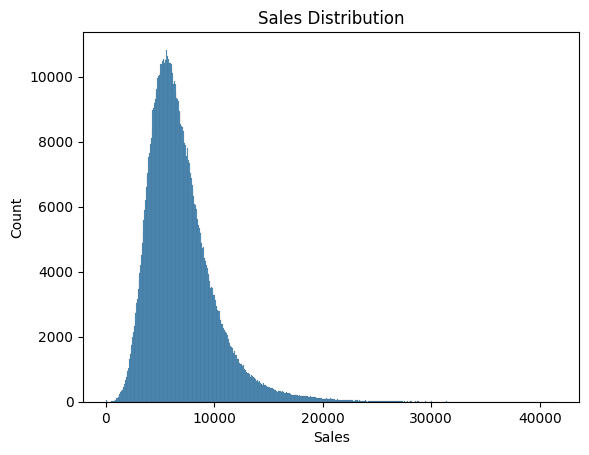

In [87]:
sns.histplot(data=train_df,x='Sales')
plt.title("Sales Distribution")
plt.show()

- From the corrleation map we can say that there is a strong correlation between Customers and Sales
- But infact Customers data is not present in test data so we won't consider in futher.

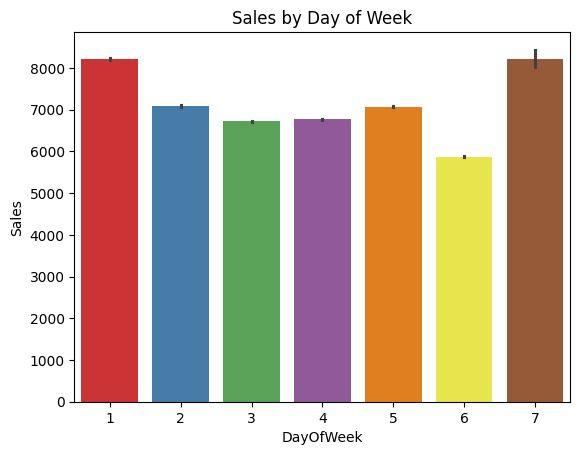

In [88]:
sns.barplot(data=train_df, x='DayOfWeek', y='Sales',palette='Set1')
plt.title("Sales by Day of Week")
plt.show()

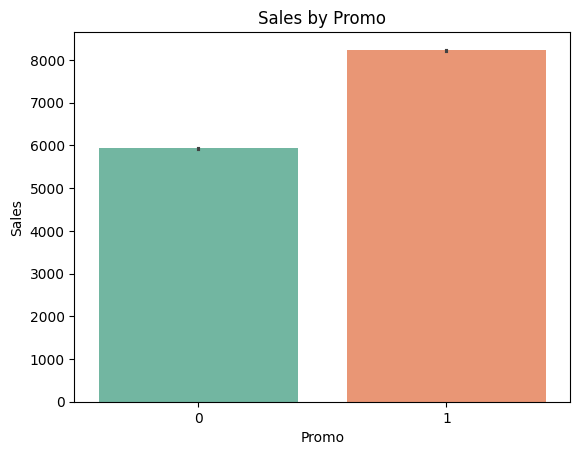

In [89]:
sns.barplot(data=train_df, x='Promo', y='Sales',palette="Set2")
plt.title("Sales by Promo")
plt.show()

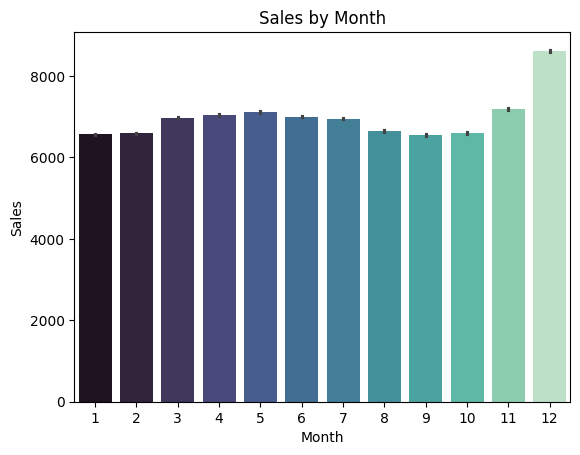

In [90]:
sns.barplot(data=train_df, x='Month', y='Sales', palette="mako")
plt.title("Sales by Month")
plt.show()

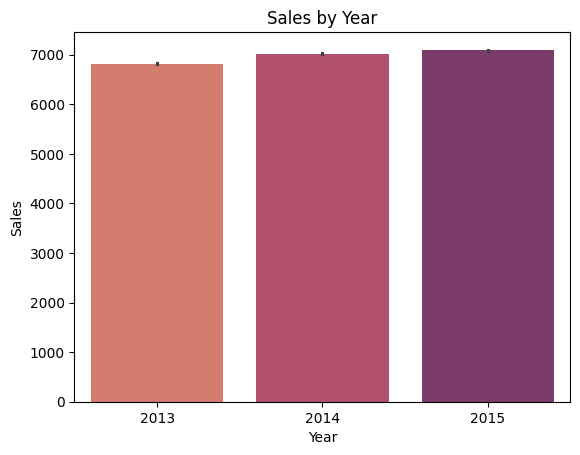

In [91]:
sns.barplot(data=train_df, x='Year', y='Sales', palette="flare")
plt.title("Sales by Year")
plt.show()

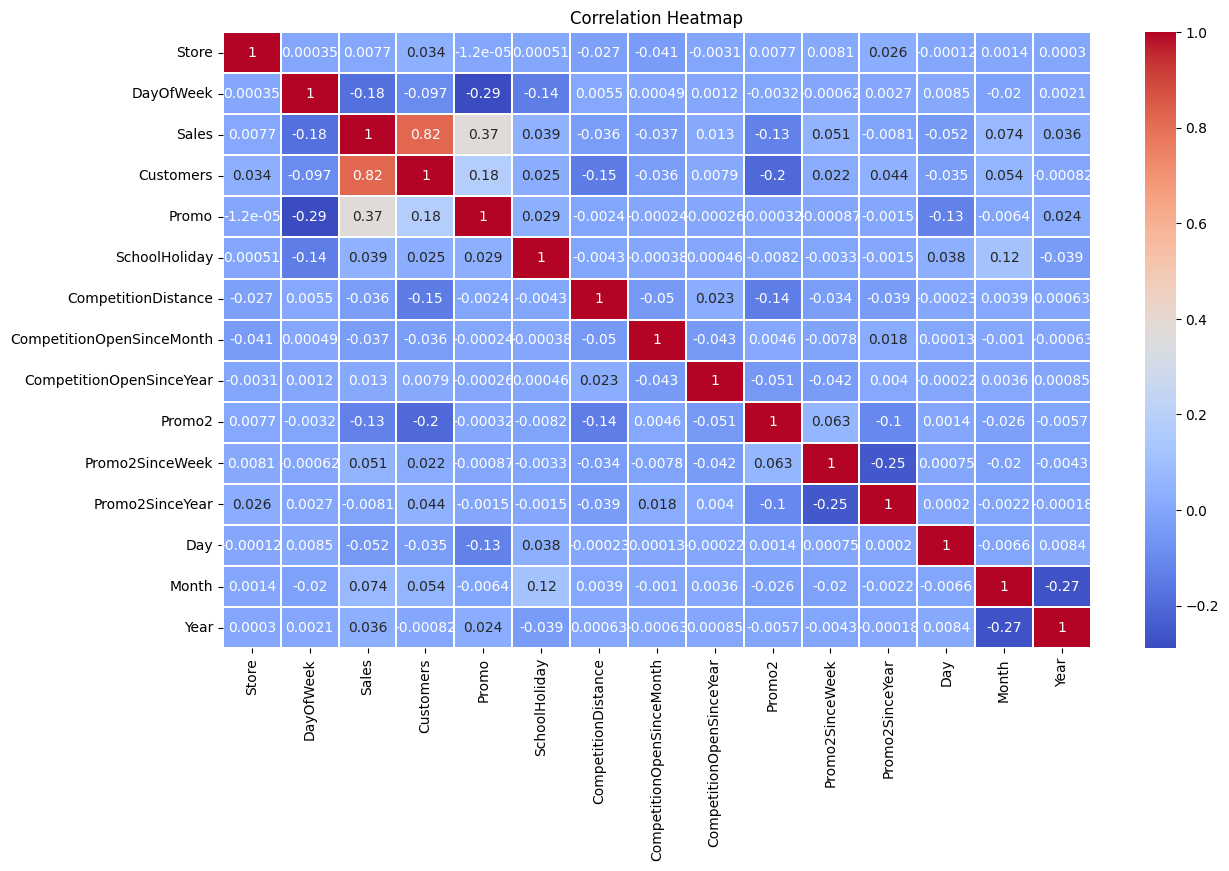

In [92]:
num_col = train_df.select_dtypes(include=['int','float']).drop(columns='Open')
plt.figure(figsize = (14,8))
sns.heatmap(num_col.corr(),annot=True, linewidth=0.3,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 6. Training and validation Splits

In [93]:
# 80% training, 20% validation
size = int(len(train_df)*0.8)

# Sort by date
train_sort = train_df.sort_values('Date')
train_df,val_df = train_sort[:size],train_sort[size:]
len(train_df),len(val_df)

(675513, 168879)

In [94]:
train_df.Date.min(),train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-01-30 00:00:00'))

In [95]:
val_df.Date.min(),val_df.Date.max()

(Timestamp('2015-01-30 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [96]:
test_df.Date.min(),test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

# 7. Define Features

In [97]:
input_cols=['Store', 'DayOfWeek', 'Promo','StateHoliday',  'StoreType', 'Assortment',
       'Day', 'Month', 'Year']

target_cols='Sales'
numeric_cols = ['Store', 'Day', 'Promo', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']


In [98]:
train_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [99]:
train_inputs,train_targets=train_df[input_cols].copy(),train_df[target_cols].copy()
val_inputs,val_targets=val_df[input_cols].copy(),val_df[target_cols].copy()
# Test data does not have targets
test_inputs = test_df[input_cols].copy()

# 8. Preprocessing (Imputation, Scaling, Encoding)

In [100]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')

In [101]:
test_inputs[numeric_cols].isna().sum()

Store    0
Day      0
Promo    0
Month    0
Year     0
dtype: int64

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [103]:
train_inputs[numeric_cols] = scaler.fit_transform(imputer.fit_transform(train_inputs[numeric_cols]))
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(imputer.transform(test_inputs[numeric_cols]))

In [104]:
from sklearn.preprocessing import OneHotEncoder

In [105]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [106]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [107]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,2,0.0,a,b,b,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,2,0.0,a,b,a,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,2,0.0,a,b,b,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,2,0.0,a,b,a,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,2,0.0,a,b,b,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203878,0.850987,5,1.0,0,a,a,0.966667,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
203879,0.851885,5,1.0,0,a,a,0.966667,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
203839,0.815978,5,1.0,0,d,c,0.966667,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
203880,0.852783,5,1.0,0,d,c,0.966667,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [108]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [109]:
X_train

,Store,Day,Promo,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203878,0.850987,0.966667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
203879,0.851885,0.966667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
203839,0.815978,0.966667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
203880,0.852783,0.966667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# 9. Evaluation Metric

In [110]:
def return_mean(input):
    return np.full(len(input),train_df.Sales.mean())
train_preds = return_mean(X_train)
train_preds

array([6914.66480586, 6914.66480586, 6914.66480586, ..., 6914.66480586,
       6914.66480586, 6914.66480586])

In [111]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(train_preds, train_targets))

3112.9318813063646

In [112]:
def rmspe(target, pred):
    target, pred = np.array(target), np.array(pred)
    non_zero_mask = target != 0
    target = target[non_zero_mask]
    pred = pred[non_zero_mask]
    rmspe_value = np.sqrt(np.mean(((target - pred) / target) ** 2)) * 100
    return f"{rmspe_value:.2f}%"

In [113]:
rmspe(train_targets,train_preds)

'64.16%'

In [114]:
np.sqrt(mean_squared_error(return_mean(X_val), val_targets)),rmspe(train_targets,train_preds)

(3070.448109971015, '64.16%')

#  10. Train and Evaluate Base Models

In [115]:
def try_model(model):
    # Fit the model
    model.fit(X_train,train_targets)

    # Generate predictions
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_val)

    # Compute RMSE
    train_rmse=np.sqrt(mean_squared_error(train_preds,train_targets))
    val_rmse =np.sqrt(mean_squared_error(val_targets, val_preds))
    return train_rmse,val_rmse
    

In [116]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor

In [117]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SGDRegressor(), DecisionTreeRegressor()]

In [118]:
results=[]
for model in models:
    train_rmse,val_rmse = try_model(model)
    results.append({
        "Model" : model.__class__.__name__,
        "Train RMSE" : round(train_rmse,3),
        "Val RMSE" : round(val_rmse,3)
    })
results_df = pd.DataFrame(results)
print(results_df.to_markdown(index=False))

| Model                 |   Train RMSE |   Val RMSE |
|:----------------------|-------------:|-----------:|
| LinearRegression      |      2768.76 |    2718.66 |
| Ridge                 |      2768.76 |    2718.66 |
| Lasso                 |      2768.89 |    2718.53 |
| ElasticNet            |      2950.76 |    2904.49 |
| SGDRegressor          |      2769.1  |    2716.09 |
| DecisionTreeRegressor |         0    |    1398.08 |


# 11. Tree-based and Ensemble Models

In [119]:
from sklearn.ensemble import RandomForestRegressor
# Initialize models
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
dt_model = DecisionTreeRegressor(random_state=42)
ridge_model = Ridge()

In [120]:
# Train models separately
rf_model.fit(X_train, train_targets)
dt_model.fit(X_train, train_targets)
ridge_model.fit(X_train, train_targets)

Ridge()

# 12. Ensemble Predictions

In [121]:
# Predict using all three models
rf_preds = rf_model.predict(X_val)
ridge_preds = ridge_model.predict(X_val)
dt_preds = dt_model.predict(X_val)

In [122]:
# Stacked Ensemble with Weighted Averaging
ensemble_preds = (0.75 * rf_preds + 0.15 * dt_preds + 0.05 * ridge_preds)

In [123]:
# Dictionary of model predictions
model_preds = {
    'RandomForest': rf_preds,
    'DecisionTree': dt_preds,
    'Ridge': ridge_preds,
    'Ensemble': ensemble_preds
}

# Collect results
r = []
for name, preds in model_preds.items():
    rmse = np.sqrt(mean_squared_error(val_targets, preds))
    rmspe_val = rmspe(val_targets, preds)  # should return float
    r.append({'Model': name, 'RMSE': round(rmse, 2), 'RMSPE': rmspe_val})


# Create DataFrame and display
r_df = pd.DataFrame(r)
print(r_df.to_markdown(index=False))

| Model        |    RMSE | RMSPE   |
|:-------------|--------:|:--------|
| RandomForest | 1154.43 | 18.74%  |
| DecisionTree | 1469.77 | 21.88%  |
| Ridge        | 2718.66 | 48.44%  |
| Ensemble     | 1306.09 | 18.76%  |


# 13.  Feature Importance Visualization

In [124]:
# Sorting Feature Importances in Descending Order for Each Model
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
dt_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
ridge_importances = pd.Series(np.abs(ridge_model.coef_), index=X_train.columns).sort_values(ascending=False)

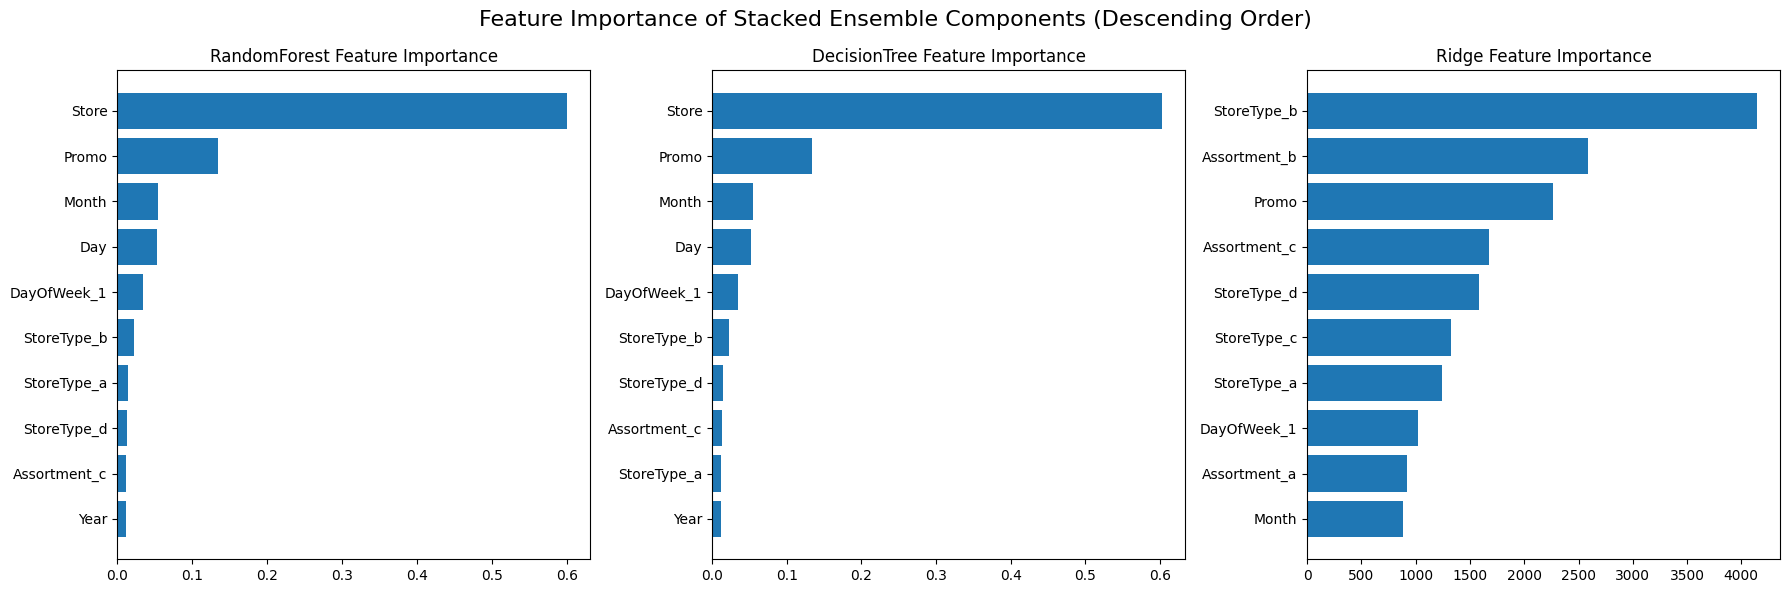

In [125]:

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Feature Importance of Stacked Ensemble Components (Descending Order)', fontsize=16)

# RandomForest
axes[0].barh(rf_importances.index[:10], rf_importances.values[:10])
axes[0].set_title('RandomForest Feature Importance')
axes[0].invert_yaxis()

# DecisionTree
axes[1].barh(dt_importances.index[:10], dt_importances.values[:10])
axes[1].set_title('DecisionTree Feature Importance')
axes[1].invert_yaxis()

# Ridge
axes[2].barh(ridge_importances.index[:10], ridge_importances.values[:10])
axes[2].set_title('Ridge Feature Importance')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

# 14.Predictions 

In [129]:
# Predict on X_test using all three models
rf_test_preds = rf_model.predict(X_test)
dt_test_preds = dt_model.predict(X_test)
ridge_test_preds = ridge_model.predict(X_test)

# Apply the Stacked Ensemble (same weights)
test_preds = (0.75 * rf_test_preds + 0.15 * dt_test_preds + 0.05 * ridge_test_preds)

# Display first 10 predictions
print("Stacked Ensemble Test Predictions (First 10):")
print(test_preds[:10])

Stacked Ensemble Test Predictions (First 10):
[4233.85130474 7083.56774977 8263.36508279 6566.48759595 6388.25402127
 5586.56153442 7670.82295974 7867.37242897 5791.81535789 5417.05691137]


In [130]:
submission_df=pd.read_csv(r"../data/sample_submission.csv")

submission_df['Sales'] = test_preds * test_df['Open'].astype('float')
submission_df.fillna(0, inplace=True)
submission_df.to_csv('../outputs/submission.csv', index=None)

In [131]:
submission_df.head()

,Id,Sales
0,1,4233.851305
1,2,7083.567750
2,3,8263.365083
3,4,6566.487596
4,5,6388.254021
